## Outlier Handling

### 5 Number Summary And Box Plot for the Outlier Handling
        Here 5 number summary means 
                1) Maximum
                2) Q1(First Quartile) or 25%(percentile)
                3) Median
                4) Q3(Third Quartile) or 75%(percentile)
                5) Minimum

In [1]:
import numpy as np

In [2]:
lst_marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]  # This is not containing any outliers
minimum, Q1, median, Q3, maximum = np.quantile(lst_marks, [0, 0.25, 0.50, 0.75, 1.0])


In [3]:
print(f"Minimum value of data is: {minimum}")
print(f"Q1 of data is: {Q1}")
print(f"Q3 of data is: {Q3}")
print(f"Median  of data is: {median}")
print(f"Maximum value of data is: {maximum}")

Minimum value of data is: 32.0
Q1 of data is: 54.0
Q3 of data is: 89.0
Median  of data is: 67.0
Maximum value of data is: 99.0


In [4]:
IQR = Q3-Q1
print(f"Inter Quartile Range is: {IQR}")

Inter Quartile Range is: 35.0


In [5]:
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)

In [6]:
print(f"Lower value considered as an outlier is: {lower_fence}")
print(f"Highest value considered as an outlier is: {higher_fence}")

Lower value considered as an outlier is: 1.5
Highest value considered as an outlier is: 141.5


In [7]:
import seaborn as sns

<Axes: >

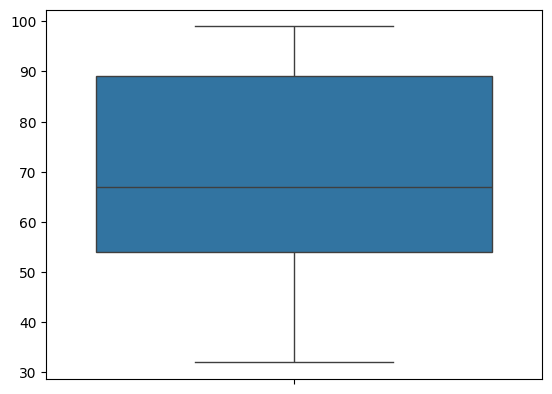

In [8]:
sns.boxplot(lst_marks)

When we are plotting the boxplot it is automatically detect the outliers and shows the outliers as points

In [9]:
lst_marks = [-50, -10, -45, 1, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 100,150, 210, 190, 180] 

<Axes: >

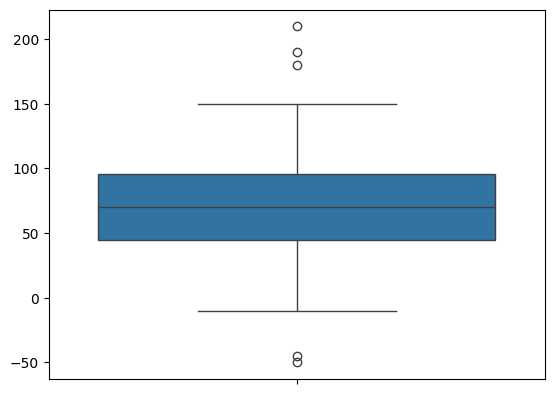

In [10]:
# plotting the boxplot for the lst_marks
sns.boxplot(lst_marks)

Here you can see that the dots are the outliers that is automatically detected by the boxplot we are not calculating the IQR, lower_fence or higher_fence

## Data Encoding
        1. Nominal/OHE Encoding
        2. Label and Ordinal Encoding
        3. Target Guided Ordinal Encoding


### Nominal/OHE Encoding
One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable variable "color" with three possible values (red, green, blue), we can represent it one hot encoding as follows

        1. Red:[1, 0, 0]
        2. Green:[0, 1, 0]
        3. Blue:[0, 0, 1]

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [12]:
## Creating a simple DataFrame

df = pd.DataFrame({
        'color':['red', 'blue', 'green', 'green', 'red', 'blue']
})

In [13]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [14]:
## Create an instance of OneHotEncoder

encoder = OneHotEncoder()

In [15]:
## Perform fit and transform

encoded = encoder.fit_transform(df[['color']]).toarray()

In [16]:
encoder_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [17]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [18]:
## concat with your original dataset

df2 = pd.concat([df, encoder_df], axis=1)


In [19]:
df2

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


### Example For Practice

In [20]:
import seaborn as sns
df1 =sns.load_dataset('tips')

In [21]:
encode = OneHotEncoder()

In [22]:
encoded = encode.fit_transform(df1[['sex', 'smoker', 'day', 'time']]).toarray()

In [23]:
encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [24]:
encoded_df1 = pd.DataFrame(encoded, columns=encode.get_feature_names_out())

In [25]:
encoded_df1.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [26]:
df1 = pd.concat([df1, encoded_df1], axis=1)
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Label Encoding 

Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

        1. Red: 1
        2. Green: 2
        3. Blue: 3

In [27]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [28]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder= LabelEncoder()

In [29]:
lbl_encoder.fit_transform(df['color'])

array([2, 0, 1, 1, 2, 0])

In [30]:
lbl_encoder.transform(['red'])

array([2])

In [31]:
lbl_encoder.transform(['blue'])

array([0])

 The problem with that the red value is higher value as compared to the blue so model get confused

### Ordinal Encoding

It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a n numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent ordinal encoding as follows:

        1. High school: 1
        2. College: 2
        3. Graduate: 3
        4. Post-graduate: 4

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
df3 = pd.DataFrame({
        'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

In [34]:
df3

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [35]:
## create an instance of OrdinalEncoder and then fit transform
encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])

In [36]:
encoder.fit_transform(df3[['size']]) ## here the large assigned with larger value

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

### Target Guided Ordinal Encoding

It is a techniques used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical values based on the mean or median of the target variable for that category. This creates a monotonic relationship between teh categorical variable and the target variable, which can improve the predictive power of our model.

In [37]:
df4 = pd.DataFrame({
        'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
        'price': [200, 150, 300, 250, 180, 320]
})

In [38]:
df4

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [39]:
mean_price =  df4.groupby('city')['price'].mean().to_dict()

In [40]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [41]:
df4['city_encoded'] = df4['city'].map(mean_price)

In [42]:
df4

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [43]:
df4[['price', 'city_encoded']] ## this is used for our model training 

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


#### Example For Practice

In [44]:
df5 =sns.load_dataset('tips')

In [45]:
df5

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
mean_total_bill =  df5.groupby('time', observed=True)['total_bill'].mean().to_dict()

In [47]:
mean_total_bill

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [48]:
df5['time_encoded'] = df5['time'].map(mean_total_bill)

In [49]:
df5

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159


In [50]:
df5[['time', 'time_encoded']].head() ## this is used for our model training 

,time,time_encoded
0,Dinner,20.797159
1,Dinner,20.797159
2,Dinner,20.797159
3,Dinner,20.797159
4,Dinner,20.797159
